In [1]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions

import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import GlobalAveragePooling2D, AveragePooling2D, Reshape, multiply, add, concatenate


In [2]:
# data preparation
dataset_dir =  r'D:\Project\Deep Learning - Research\programs\MV-couswork\Brain Tumor Data Set\BrainTumorProcessed'
input_shape = (256, 256, 3)
batch_size = 4
num_classes = 2

In [3]:
# data augumentation
train_datagen = ImageDataGenerator(
rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)

test_datagen = ImageDataGenerator(
rescale = 1./255
)

In [4]:
train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_dir, 'train'),
    target_size = input_shape[:2],
    batch_size = batch_size,
    class_mode = 'binary'
)

validation_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_dir, 'val'),
    target_size = input_shape[:2],
    batch_size = batch_size,
    class_mode = 'binary'
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(dataset_dir, 'test'),
    target_size = input_shape[:2],
    batch_size = batch_size,
    class_mode = 'binary'
)

Found 3103 images belonging to 2 classes.
Found 665 images belonging to 2 classes.
Found 666 images belonging to 2 classes.


In [5]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(include_top=False, weights='imagenet', input_shape=input_shape)

In [6]:
# Add custom top layers for classification

x = base_model.output


x = GlobalAveragePooling2D()(base_model.output)
output = Dense(1, activation='sigmoid')(x)

In [7]:
model = Model(inputs=base_model.input, outputs=output)

In [8]:
# Freeze base layers to prevent their weights from being updated
for layer in base_model.layers:
    layer.trainable = False

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [10]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
history = model.fit(train_generator, epochs=10, validation_data =(validation_generator), verbose=1)

Epoch 1/10
776/776 [==============================] - 50s 61ms/step - loss: 0.6256 - accuracy: 0.6903 - val_loss: 0.5703 - val_accuracy: 0.7323
Epoch 2/10
776/776 [==============================] - 47s 61ms/step - loss: 0.5370 - accuracy: 0.7718 - val_loss: 0.5162 - val_accuracy: 0.7774
Epoch 3/10
776/776 [==============================] - 48s 61ms/step - loss: 0.4860 - accuracy: 0.8092 - val_loss: 0.4772 - val_accuracy: 0.7805
Epoch 4/10
776/776 [==============================] - 47s 61ms/step - loss: 0.4535 - accuracy: 0.8176 - val_loss: 0.4570 - val_accuracy: 0.7850
Epoch 5/10
776/776 [==============================] - 47s 61ms/step - loss: 0.4286 - accuracy: 0.8302 - val_loss: 0.4398 - val_accuracy: 0.7955
Epoch 6/10
776/776 [==============================] - 47s 61ms/step - loss: 0.4067 - accuracy: 0.8443 - val_loss: 0.4302 - val_accuracy: 0.8165
Epoch 7/10
776/776 [==============================] - 47s 60ms/step - loss: 0.3934 - accuracy: 0.8453 - val_loss: 0.4110 - val_accuracy:

In [12]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test accuracy:", test_acc)

167/167 [==============================] - 3s 15ms/step - loss: 0.3610 - accuracy: 0.8483
Test accuracy: 0.8483483195304871


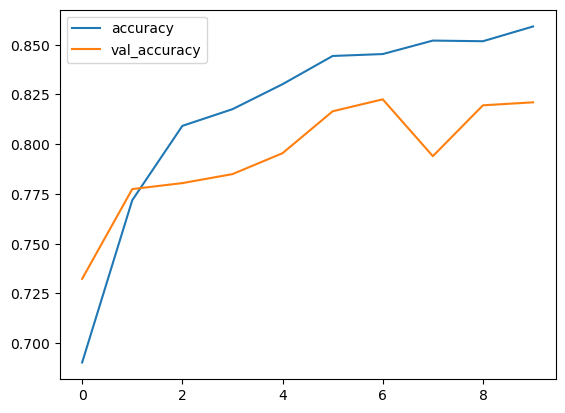

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

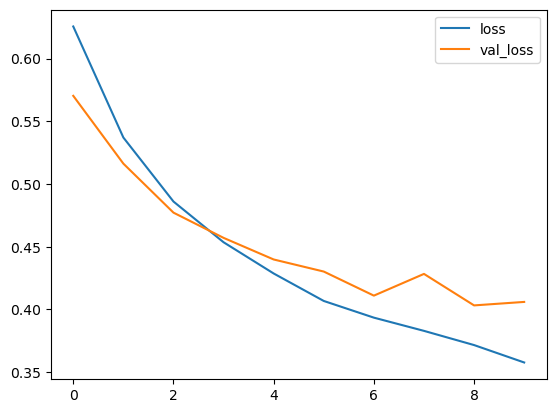

In [14]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()